# Proyek Analisis Data: Customer_dataset.csv
- **Nama:** Radithya Fawwaz Aydin
- **Email:** radith.fa@gmail.com
- **ID Dicoding:** Radithya Fawwaz Aydin

## Menentukan Pertanyaan Bisnis

- Berapa banyak pelanggan unik yang kembali melakukan pembelian?
- Bagaimana distribusi pelanggan berdasarkan kota?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Sesuai dengan pertanyaan yang saya ajukan, kali ini akan menggunakan "customer_dataset.csv" untuk kita gali lebih lanjut.

In [2]:
file_path = "C:/Users/Lenovo/Documents/Courses (belajar)/DBS Coding Camp/Dicoding Modul/Belajar Analisis Data dengan Python/Proyek-Akhir_Analisis-Data-dengan-Python_Dicoding/Dataset/customers_dataset.csv"

df = pd.read_csv(file_path)
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Menampilkan jumlah baris dan kolom dalam dataset
df.shape
# Menampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Jumlah data: 99.441 baris, 5 kolom
- customer_id: ID pelanggan unik
- customer_unique_id: ID pelanggan unik untuk pelanggan yang sama
- customer_zip_code_prefix: Kode pos pelanggan
- customer_city: Kota pelanggan
- customer_state: Negara bagian pelanggan

In [4]:
# Menampilkan ringkasan statistik dasar untuk melihat distribusi data
data_description = df.describe(include="all")
print(data_description)

                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  

In [5]:
# Menampilkan jumlah nilai yang hilang per kolom
df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak ada data yang hilang di semua kolom.

### Assessing Data

#### Duplikasi data

In [6]:
# Mengecek duplikasi data
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [7]:
# Mengecek jumlah transaksi per pelanggan unik
transaction_counts = df["customer_unique_id"].value_counts()
transaction_counts

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

#### Inkonsistensi data

In [8]:
# Mengecek jumlah kota dan provinsi unik
unique_cities = df["customer_city"].nunique()
unique_states = df["customer_state"].nunique()

# Mengecek ejaan kota yang mungkin tidak konsisten (contoh: huruf besar/kecil)
city_variations = df["customer_city"].str.lower().nunique()

# Menampilkan hasil
unique_cities, unique_states, city_variations

(4119, 27, 4119)

**Insight:**
1. Kualitas Data (Duplikasi & Missing Values)
    - Tidak ada nilai yang hilang (missing values) di dataset.
    - Tidak ada duplikasi di seluruh kolom, sehingga setiap baris mewakili transaksi yang valid.
    - Pelanggan unik yang berulang kali bertransaksi ditemukan, dengan jumlah transaksi per pelanggan berkisar antara 1    hingga 17 kali. Namun, 75% pelanggan hanya bertransaksi sekali.
2. Konsistensi Data (Inkonsistensi & Format)
    - Nama kota tidak mengalami inkonsistensi kapitalisasi huruf, sehingga tidak ada masalah ejaan yang terdeteksi secara langsung.
    - Terdapat 4.119 kota unik dan 27 provinsi unik, yang sesuai dengan jumlah provinsi di Brasil.

### Cleaning Data

Sebenarnya untuk dataset ini sudah cenderung bersih, tetapi saya akan melakukan beberapa perbaikan kecil.

#### Menghapus kolom yang tidak diperlukan (jika ada)

In [9]:
# Menghapus kolom yang tidak diperlukan (misalnya, customer_zip_code_prefix yang tidak akan digunakan)
df_cleaned = df.drop(columns=["customer_zip_code_prefix"])

#### Normalisasi nama kota (seperti, menghilangkan spasi berlebih atau karakter aneh)

In [10]:
# Normalisasi nama kota (menghapus spasi ekstra & mengonversi ke format title case)
df_cleaned["customer_city"] = df_cleaned["customer_city"].str.strip().str.title()

In [11]:
# Mengecek kembali apakah ada perubahan setelah cleaning
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [12]:
df_cleaned.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,Campinas,SP


**Insight:**
- Kolom customer_zip_code_prefix dihapus karena tidak diperlukan.
- Nama kota dinormalisasi (menghilangkan spasi berlebih dan dikonversi ke format Title Case).
- Tidak ada perubahan jumlah data, menandakan tidak ada nilai yang hilang dalam proses ini.

## Exploratory Data Analysis (EDA)

### Explore ...

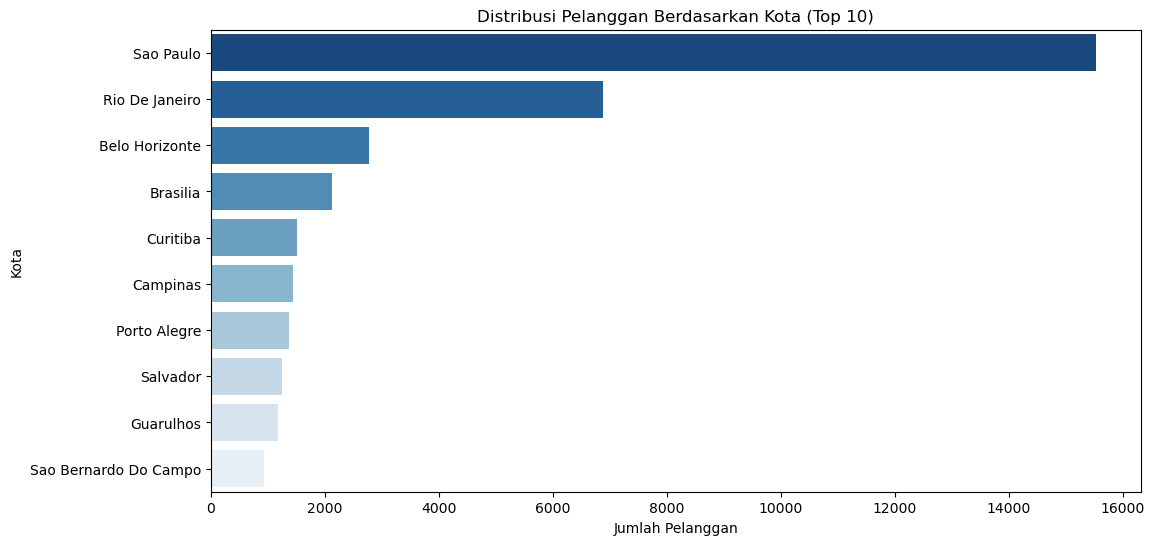

(2997,
 96096,
 3.1187562437562435,
 customer_city
 Sao Paulo                15540
 Rio De Janeiro            6882
 Belo Horizonte            2773
 Brasilia                  2131
 Curitiba                  1521
 Campinas                  1444
 Porto Alegre              1379
 Salvador                  1245
 Guarulhos                 1189
 Sao Bernardo Do Campo      938
 Name: count, dtype: int64)

In [13]:
# 1. Mengecek jumlah pelanggan yang kembali bertransaksi
repeat_customers = df_cleaned["customer_unique_id"].value_counts()
repeat_count = (repeat_customers > 1).sum()
unique_customers = repeat_customers.count()
repeat_percentage = (repeat_count / unique_customers) * 100

# 2. Distribusi pelanggan berdasarkan kota (Top 10 kota dengan pelanggan terbanyak)
top_cities = df_cleaned["customer_city"].value_counts().head(10)

# Visualisasi: Distribusi pelanggan berdasarkan kota
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Blues_r")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.title("Distribusi Pelanggan Berdasarkan Kota (Top 10)")
plt.show()

# Menampilkan hasil analisis
repeat_count, unique_customers, repeat_percentage, top_cities

**Insight:**

1️. Pelanggan yang Kembali Bertransaksi
- Total pelanggan unik: 96.096 pelanggan
- Pelanggan yang kembali membeli: 2.997 pelanggan (3.12%)
- Mayoritas pelanggan hanya bertransaksi sekali, dengan hanya sekitar 3.12% pelanggan yang melakukan pembelian ulang.
- Ini menunjukkan bahwa retensi pelanggan cukup rendah, dan bisa menjadi area yang perlu ditingkatkan.

2️. Distribusi Pelanggan Berdasarkan Kota
- Kota dengan jumlah pelanggan terbanyak: São Paulo (15.540 pelanggan)
- Dikuti oleh:
    1. Rio de Janeiro (6.882 pelanggan)
    2. Belo Horizonte (2.773 pelanggan)
    3. Brasília (2.131 pelanggan)
    4. Curitiba (1.521 pelanggan)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak pelanggan unik yang kembali melakukan pembelian?

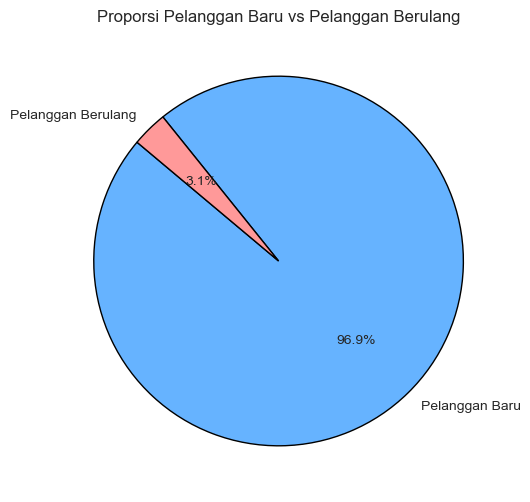

In [14]:
# Setup gaya visualisasi
sns.set_style("whitegrid")

# 1. Visualisasi Retensi Pelanggan (Pelanggan Baru vs Repeat Customers)
plt.figure(figsize=(6, 6))
labels = ["Pelanggan Baru", "Pelanggan Berulang"]
sizes = [unique_customers - repeat_count, repeat_count]
colors = ["#66b3ff", "#ff9999"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Proporsi Pelanggan Baru vs Pelanggan Berulang")
plt.show()

**Proporsi Pelanggan Baru vs Pelanggan Berulang**

- Grafik pie ini menunjukkan bahwa mayoritas pelanggan (96.88%) hanya melakukan pembelian sekali, sementara hanya 3.12% yang kembali melakukan pembelian.
- Hal ini menunjukkan bahwa retensi pelanggan cukup rendah, sehingga bisa menjadi area yang perlu ditingkatkan melalui strategi pemasaran ulang atau program loyalitas.

### Pertanyaan 2: Bagaimana distribusi pelanggan berdasarkan kota?

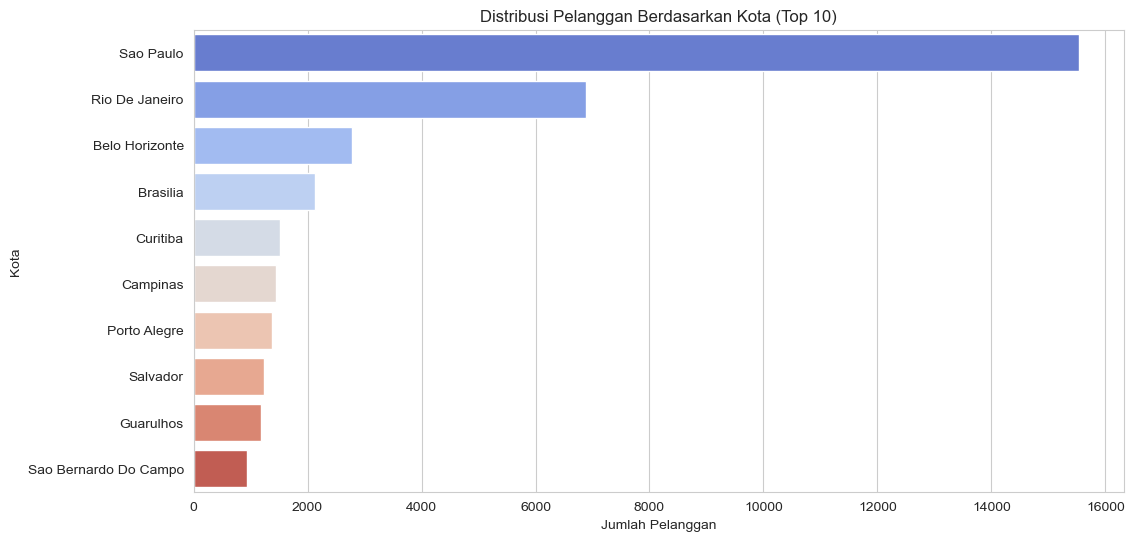

In [15]:
# Visualisasi Distribusi Pelanggan Berdasarkan Kota
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.title("Distribusi Pelanggan Berdasarkan Kota (Top 10)")
plt.show()

**Distribusi Pelanggan Berdasarkan Kota**
- Grafik batang ini menunjukkan 10 kota dengan jumlah pelanggan terbanyak.
- São Paulo mendominasi dengan 15.540 pelanggan, jauh lebih tinggi dibanding kota lain.
- Kota besar lainnya seperti Rio de Janeiro, Belo Horizonte, dan Brasília juga memiliki jumlah pelanggan yang cukup tinggi, menjadikannya target potensial untuk ekspansi bisnis atau pemasaran yang lebih agresif.

**Insight:**
- Peluang besar untuk meningkatkan retensi pelanggan melalui strategi pemasaran.
- São Paulo adalah pasar utama, yang bisa menjadi prioritas dalam strategi bisnis.

## Conclusion

- Conclution pertanyaan 1 : Berapa banyak pelanggan unik yang kembali melakukan pembelian?
1. Dari 96.096 pelanggan unik, hanya 2.997 pelanggan (3.12%) yang melakukan pembelian lebih dari satu kali.
2. Mayoritas pelanggan (96.88%) hanya bertransaksi sekali, menunjukkan bahwa retensi pelanggan cukup rendah.
3. Untuk meningkatkan angka ini, strategi seperti program loyalitas, diskon untuk pembelian berikutnya, atau email marketing bisa diterapkan agar pelanggan kembali berbelanja.

- Conclution pertanyaan 2 : Bagaimana distribusi pelanggan berdasarkan kota?
1. São Paulo memiliki jumlah pelanggan terbanyak (15.540 pelanggan), menjadikannya pasar utama dalam bisnis ini.
2. Rio de Janeiro (6.882 pelanggan), Belo Horizonte (2.773 pelanggan), dan Brasília (2.131 pelanggan) juga memiliki jumlah pelanggan yang signifikan.
3. Ini menunjukkan bahwa kota-kota besar seperti São Paulo dan Rio de Janeiro dapat menjadi prioritas utama dalam strategi pemasaran dan distribusi produk.
